# PIMA Diabetes Prediction and Analysis

The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details. This dataset is a small dataset which includes 8 key features & a binary target value as follows:

    Number of times pregnant
    Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    Diastolic blood pressure (mm Hg)
    Triceps skin fold thickness (mm)
    2-Hour serum insulin (mu U/ml)
    Body mass index (weight in kg/(height in m)^2)
    Diabetes pedigree function
    Age (years)
    Class variable (0 or 1)

A small logistic regression model will be developed in an attempt to predict whether a patient is likely (represented by 1) or not likely (represented by 0) to develop diabetes in the next 5 years.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

Let's load the Dataset...!!!

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Next, lets verify the existence of any null values..!!!

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().values.any()

False

Datatypes used for attributes

In [8]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Before implementing a model to preict the likelihood of diabetes it is first useful to visualise some basic details about the dataset.
Let's do some visualizations...

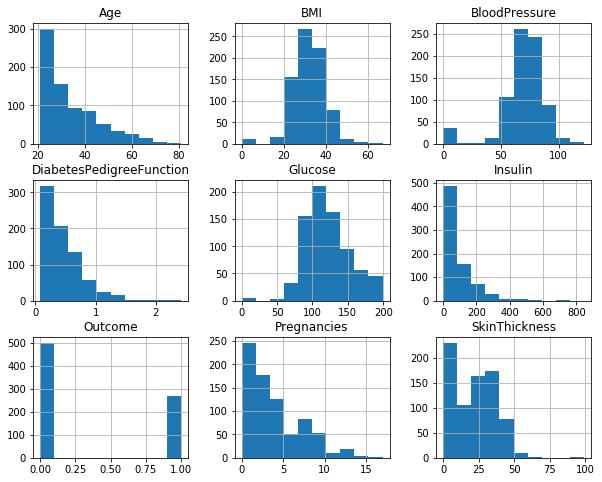

In [11]:
#df.hist()
hist = df.hist(figsize=(10,8))

### Outcome 

0    500
1    268
Name: Outcome, dtype: int64

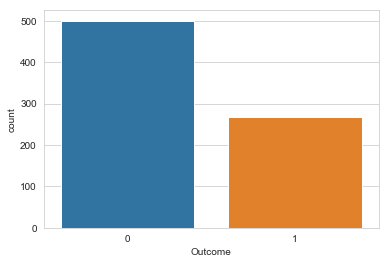

In [62]:
current_palette = sns.color_palette()
sns.countplot(x = 'Outcome', data = df)
df['Outcome'].value_counts()

### Age and Outcome

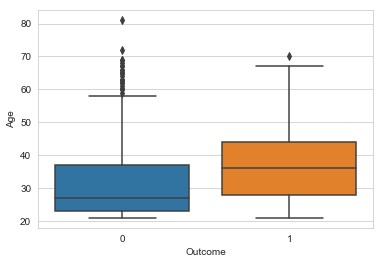

In [63]:


sns.set_style('whitegrid')
sns.boxplot(x = 'Outcome',y = 'Age',data = df)

the above boxplot shows that females in higher age group tend to have diabetes

### Outcome & BloodPressure

C:\Users\student\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


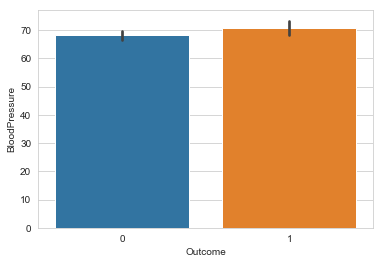

In [15]:
sns.barplot(x= 'Outcome', y='BloodPressure', data = df)

### Outcome & Skin Thickness

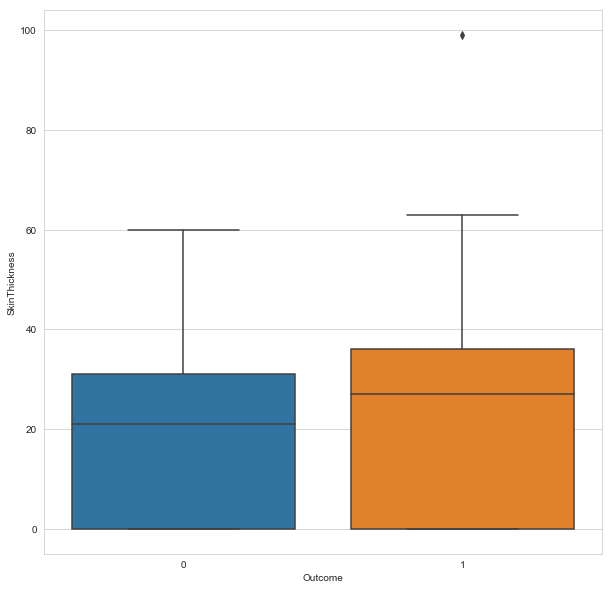

In [16]:
plt.figure(figsize=(10,10))
sns.boxplot(x= 'Outcome', y='SkinThickness', data = df)

### Outcome & Pregnancies

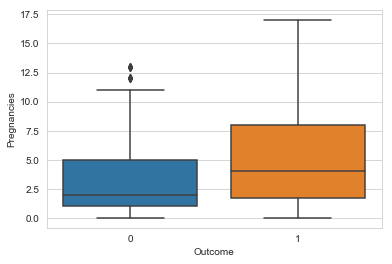

In [17]:
sns.boxplot(x = 'Outcome',y = 'Pregnancies',data = df)

the above boxplot shows the relationship between number of pregnancies and whether or not a patient is having diabetes

Next check the pregnancy count of patients

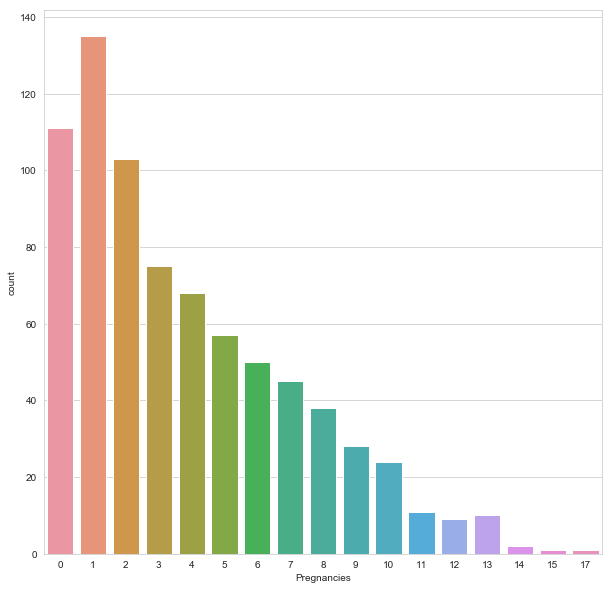

In [18]:
plt.figure(figsize = (10,10))
sns.countplot(df['Pregnancies'])

#### FactPlot Representation of Diabetic Pedigree Function with outcome

<Figure size 720x864 with 0 Axes>

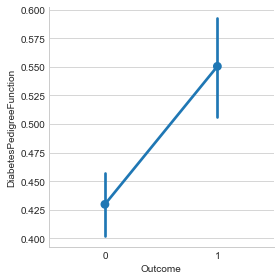

In [16]:
#Diabetes pedigree function
plt.figure(figsize=(10,12))
sns.factorplot(x= 'Outcome', y='DiabetesPedigreeFunction', data = df)

### Glucose Level and outcome

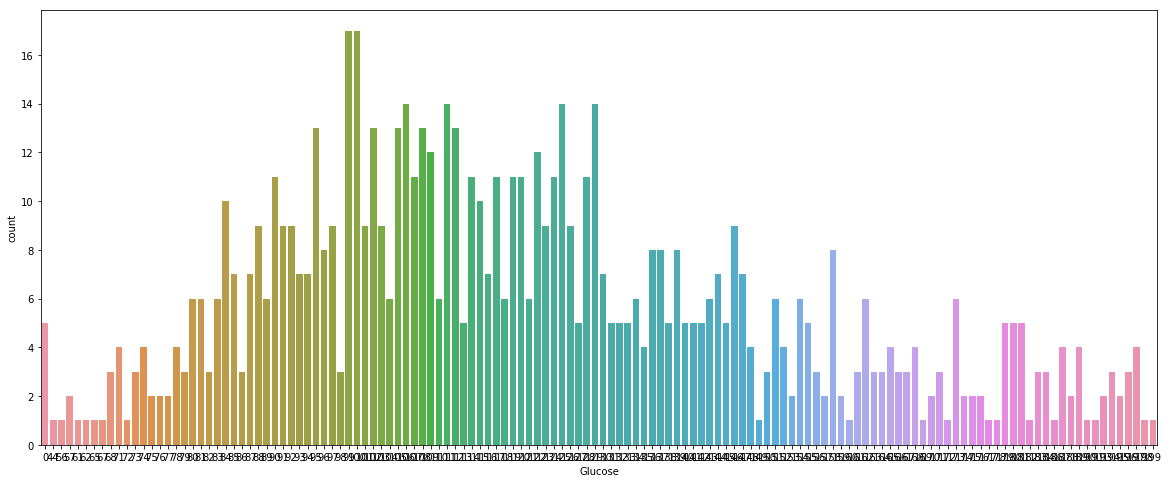

In [12]:
#Glucose Level and outcome
plt.figure(figsize = (20,8))
sns.countplot(df['Glucose'])

### Correlation Table

In [13]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


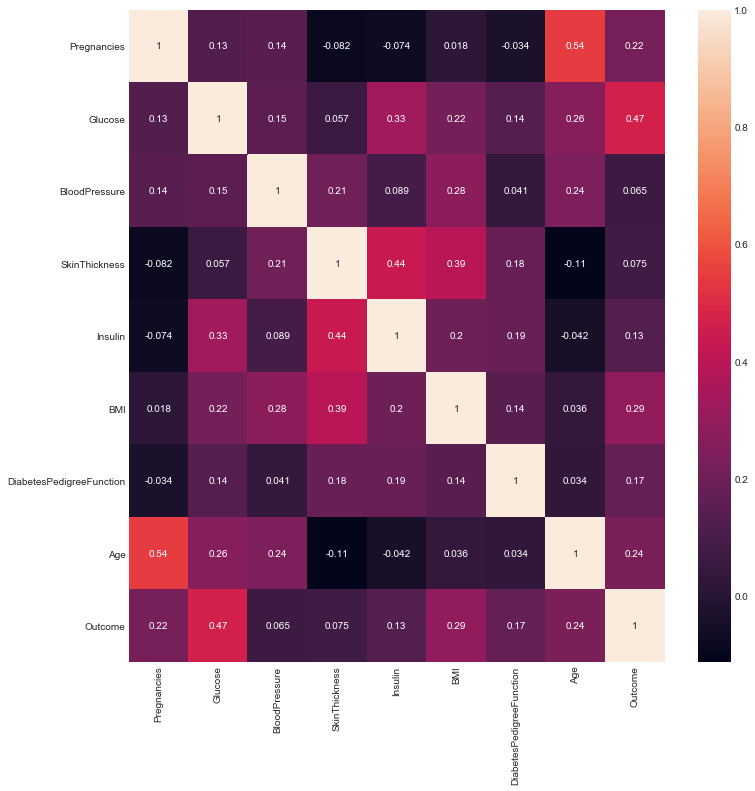

In [19]:
corr = df.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr,annot=True )

# Skin Thickness

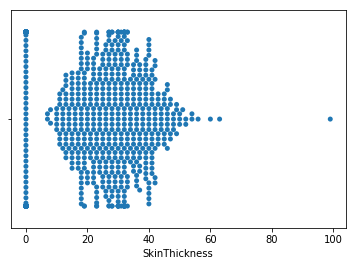

In [15]:
sns.swarmplot(x ='SkinThickness', data = df)

clearly there is a value which effects the prediction So remove the value which is above 80

In [16]:
df.drop(df.index[579], inplace = True)

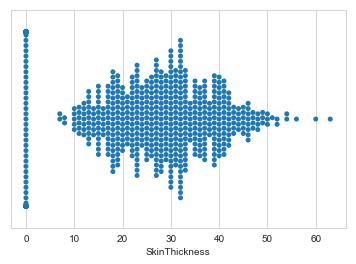

In [25]:
sns.swarmplot(x ='SkinThickness', data = df)

### Let's check the correlation of other attributes with the Outcome

In [18]:
correlations = df.corr()
correlations['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.464625
BMI                         0.292461
Age                         0.235203
Pregnancies                 0.223189
DiabetesPedigreeFunction    0.173512
Insulin                     0.131984
SkinThickness               0.067136
BloodPressure               0.065065
Name: Outcome, dtype: float64

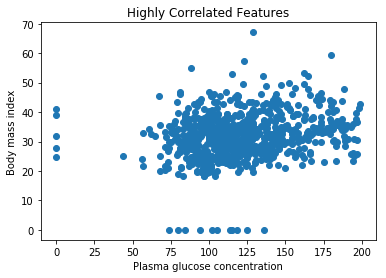

In [19]:
def visualise(df):
    fig, ax = plt.subplots()
    ax.scatter(df.iloc[:,1].values, df.iloc[:,5].values)
    ax.set_title('Highly Correlated Features')
    ax.set_xlabel('Plasma glucose concentration')
    ax.set_ylabel('Body mass index')

visualise(df)

After viewing the scatter plot above it is immediately obvious that we have some missing values in this dataset. With some domain knowledge we can deduce that it should not be possible to have a body mass index or plasma glucose concentration of 0 and we will need to remove this dirty data before building our learning model. This can be achieved quickly by replacing the missing values with NaN and then removing these rows from the dataset.

In [20]:
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for column in zero_not_accepted:
    df[column] = df[column].replace(0, np.NaN)
    mean = int(df[column].mean(skipna=True))
    df[column] =df[column].replace(np.NaN, mean)

Once the data has been cleaned up our scatter plot looks much more uniform.

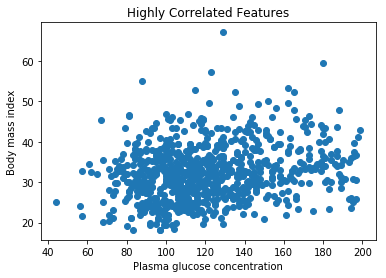

In [21]:
visualise(df)

# Train Test Split

In [22]:
X = df.drop('Outcome', axis =1)
#X.head()
y =df['Outcome']
#y.head()

Next we will split the dataset into a training set and a test set which will be useful when evaluating the model's performace. An 80% / 20% split will be used when splitting the dataset.

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Once we have our training set and test set we can define a `LogisticRegression` model and fit it to our training data. Once trained, the model can then be used to make predictions against the test set.

# Logistic Regression 

In [52]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)


In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
# creating object of LogisticRegression class
classifier_logis = LogisticRegression(random_state=0)
# fitting the model/ training the model on training data (X_train,t_train)
classifier_logis.fit(X_train,y_train)
# predicting whether the points (people/rows) in the test set (X_test) have the liver disease or not
y_pred_logis = classifier_logis.predict(X_test)
# evaluating model performance by confusion-matrix
cm_logis = confusion_matrix(y_test,y_pred_logis)
print(cm_logis)
# accuracy-result of LogisticRegression model
accuracy_logis = accuracy_score(y_test,y_pred_logis)
print('The accuracy of LogisticRegression is : ', str(accuracy_logis*100) , '%')

[[93 11]
 [18 32]]
The accuracy of LogisticRegression is :  81.16883116883116 %


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 767 non-null int64
Glucose                     767 non-null float64
BloodPressure               767 non-null float64
SkinThickness               767 non-null float64
Insulin                     767 non-null float64
BMI                         767 non-null float64
DiabetesPedigreeFunction    767 non-null float64
Age                         767 non-null int64
Outcome                     767 non-null int64
dtypes: float64(6), int64(3)
memory usage: 59.9 KB


In [25]:
#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test, y_pred)
#print(cm)

[[93 11]
 [18 32]]


In [26]:
def precision_recall(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)    
    tp = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    tn= cm[1,1]
    prec = tp / (tp+fp)
    rec = tp / (tp+fn)
    accr= (tp+tn)/(tp+fp+fn+tn)
    return prec, rec, accr

precision, recall, accuracy = precision_recall(y_test, y_pred)
print('Precision: %f Recall %f' % (precision, recall))
print('Accuracy: %f' % (accuracy))

Precision: 0.894231 Recall 0.837838
Accuracy: 0.811688


In [36]:
#model.coef_
#model.score(X_train, X_test)

# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, X, y, cv=10)

array([0.66233766, 0.72727273, 0.7012987 , 0.62337662, 0.64935065,
       0.68831169, 0.64935065, 0.68421053, 0.68421053, 0.78947368])

In [28]:
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

0.7402597402597403

# svm

In [29]:
#from sklearn import svm
#clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
#pre = clf.predict(X_test) 
#print(clf.score(X_test, y_test))
#svm_accr = clf.score(X_test, y_test)


0.8116883116883117


In [48]:
from sklearn.svm import SVC
# creating object of SVC class
classifier_svc = SVC(kernel='rbf', random_state=0, gamma='auto')
# fitting the model/ training the model on training data (X_train,t_train)
classifier_svc.fit(X_train,y_train)
# predicting whether the points (people/rows) in the test set (X_test) have the liver disease or not
y_pred_svc = classifier_svc.predict(X_test)
# evaluating model performance by confusion-matrix
cm_svc = confusion_matrix(y_test,y_pred_svc)
print(cm_svc)
# accuracy-result of SVC model
accuracy_svc = accuracy_score(y_test,y_pred_svc)
print('The accuracy of SupportVectorClassification is : ', str(accuracy_svc*100) , '%')

[[104   0]
 [ 50   0]]
The accuracy of SupportVectorClassification is :  67.53246753246754 %


# knn

In [30]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Define the model: Init K-NN
classifier = KNeighborsClassifier(n_neighbors=10, p=2, metric='minkowski')

# Fit Model
classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = classifier.predict(X_test)

# Evaluate Model
cm = confusion_matrix(y_test, y_pred)
print (cm)
#print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
# STEP 5: Evaluate Model
#########################
# Making the confusion matrix
#cm = confusion_matrix(y_test, y_pred)
#print (cm)
#print(f1_score(y_test, y_pred))
#print(accuracy_score(y_test, y_pred))

[[89 15]
 [22 28]]
0.7597402597402597


# RANDOM FOREST

In [47]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import cross_val_score

#clf1 = RandomForestClassifier(max_depth=2, random_state=0)
#clf1.fit(X_train, y_train)
#clf1.predict(X_test)
#acc_random=clf1.score(X_test, y_test)
#print(acc_random)


In [38]:
from sklearn.ensemble import RandomForestClassifier
# creating object of RandomForestClassifier class
classifier_rfc = RandomForestClassifier(n_estimators=250, criterion='entropy',random_state=0 )
# fitting the model/ training the model on training data (X_train,t_train)
classifier_rfc.fit(X_train,y_train)
# predicting whether the points (people/rows) in the test set (X_test) have the liver disease or not
y_pred_rfc = classifier_rfc.predict(X_test)
# evaluating model performance by confusion-matrix
cm_rfc = confusion_matrix(y_test,y_pred_rfc)
print(cm_rfc)
# accuracy-result of RandomForestClassifier model
accuracy_rfc = accuracy_score(y_test,y_pred_rfc)
print('The accuracy of RandomForestClassifier is : ', str(accuracy_rfc*100) , '%')



[[90 14]
 [14 36]]
The accuracy of RandomForestClassifier is :  81.81818181818183 %


# ANN

In [54]:
from sklearn.neural_network import MLPClassifier
clf2 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf2.fit(X_train, y_train)
clf2.predict(X_test)
clf2.score(X_test, y_test)

0.6753246753246753

In [43]:
#help(SVC)
#from sklearn.svm import SVC
#model_linear = SVC(kernel = "linear")
#model_linear.fit(X_train,y_train)
#pred_test_linear = model_linear.predict(X_test)

In [44]:
#pred_test_linear = model_linear.predict(X_test)

#xyz=np.mean(pred_test_linear==y_test)
#print(xyz)

In [42]:
models_comparison = [['Logistic Regression',accuracy_logis*100],
                     ['Support Vector Classfication',accuracy_svc*100], 
                     ['Random Forest Classifiaction',accuracy_rfc*100]
                    ]
models_compaison_df = pd.DataFrame(models_comparison,columns=['Model','% Accuracy'])
models_compaison_df.head()

,Model,% Accuracy
0,Logistic Regression,81.168831
1,Support Vector Classfication,67.532468
2,Random Forest Classifiaction,81.818182


Text(0.5,0,'Model')

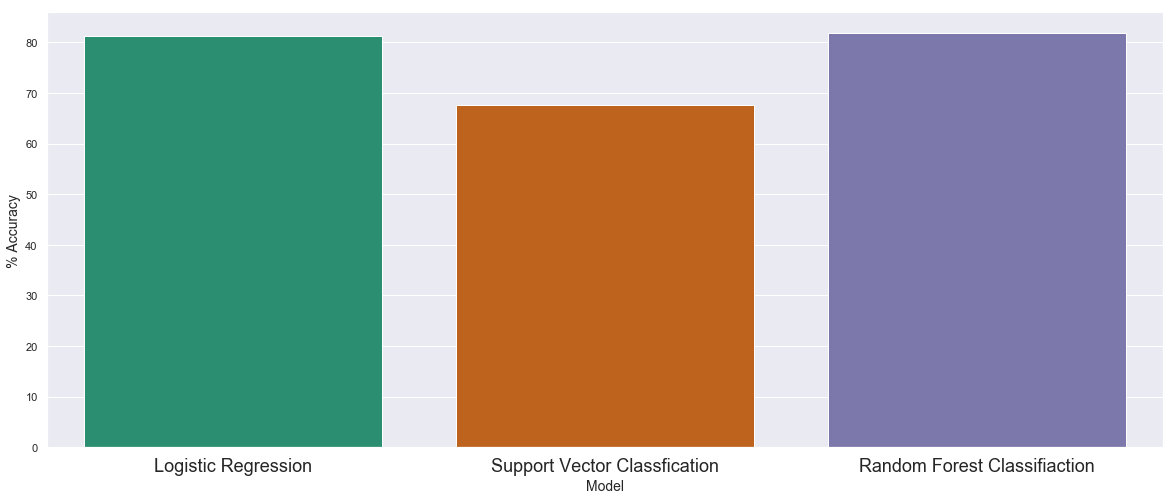

In [43]:
fig = plt.figure(figsize=(20,8))
sns.set()
sns.barplot(x='Model',y='% Accuracy',data=models_compaison_df,palette='Dark2')
plt.xticks(size=18)
plt.ylabel('% Accuracy',size=14)
plt.xlabel('Model',size=14)

# value input

In [44]:
Pregnancies = [5]
Glucose= [121]
BloodPressure= [72]
SkinThickness= [23]
Insulin= [112]
BMI= [26.2]
DiabetesPedigreeFunction= [0.245]
Age= [30]
#Outcome= [1, 2, 3, 4,5]

# Creating a data frame using explicits lists
X1 = pd.DataFrame(columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]) 
X1["Pregnancies"] = pd.Series(Pregnancies)
X1["Glucose"] = pd.Series(Glucose)
X1["BloodPressure"] = pd.Series(BloodPressure)
X1["SkinThickness"] = pd.Series(SkinThickness)
X1["Insulin"] = pd.Series(Insulin)
X1["BMI"] = pd.Series(BMI)
X1["DiabetesPedigreeFunction"] = pd.Series(DiabetesPedigreeFunction)
X1["Age"] = pd.Series(Age)
#X["X1"] = pd.Series(x1) 
X1.iloc[:,:]
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train.ravel())
y_pred = model.predict(X1)

print(y_pred)

[0]
